In [ ]:
pip install --upgrade xgboost scikit-learn --quiet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load the dataset
file_path = '/content/real data.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,4/12/2009,4/18/2009,PRV55912,26000,PHY390922,NaN,NaN,4/12/2009,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11001,CLM66048,8/31/2009,9/2/2009,PRV55907,5000,PHY318495,PHY318495,NaN,8/31/2009,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No
2,BENE11001,CLM68358,9/17/2009,9/20/2009,PRV56046,5000,PHY372395,NaN,PHY324689,9/17/2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,BENE11011,CLM38412,2/14/2009,2/22/2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,2/14/2009,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No
4,BENE11014,CLM63689,8/13/2009,8/30/2009,PRV56614,10000,PHY379376,PHY398258,NaN,8/13/2009,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,9/28/2009,10/2/2009,PRV53671,7000,PHY345332,PHY319565,NaN,9/28/2009,...,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN,Yes
40470,BENE159175,CLM74504,11/3/2009,11/6/2009,PRV54981,4000,PHY342806,PHY365497,NaN,11/3/2009,...,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN,No
40471,BENE159177,CLM76485,11/18/2009,11/22/2009,PRV56588,3000,PHY423220,PHY332752,NaN,11/18/2009,...,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,Yes
40472,BENE159177,CLM79949,12/17/2009,12/18/2009,PRV56575,5000,PHY353156,NaN,NaN,12/17/2009,...,414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


## **Fraud Count**

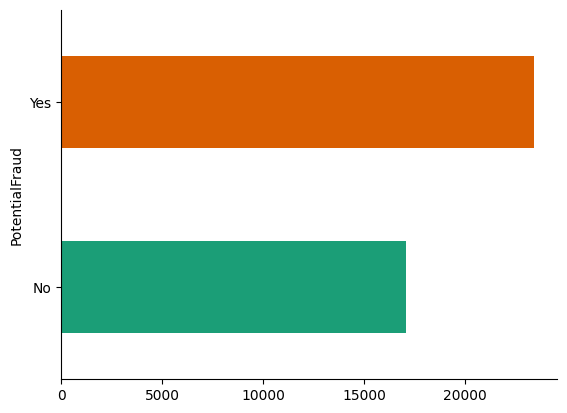

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('PotentialFraud').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
print('Printing Null Values.\n\n',data.isnull().sum())

Printing Null Values.

 BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
PotentialFraud  

# **Data PreProcessing**

**Handeling Missing Values**

In [ ]:
data.fillna(0, inplace=True)

**Handeling Dates**

In [ ]:
date_columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime, coercing invalid dates to NaT
    data[f'{col}_Day'] = data[col].dt.day
    data[f'{col}_Month'] = data[col].dt.month
    data[f'{col}_Year'] = data[col].dt.year

data.drop(columns=date_columns, inplace=True)
data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClaimStartDt_Year,ClaimEndDt_Day,ClaimEndDt_Month,ClaimEndDt_Year,AdmissionDt_Day,AdmissionDt_Month,AdmissionDt_Year,DischargeDt_Day,DischargeDt_Month,DischargeDt_Year
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,0,0,7866,1068.0,201,...,2009,18,4,2009,12,4,2009,18,4,2009
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,0,6186,1068.0,750,...,2009,2,9,2009,31,8,2009,2,9,2009
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,0,PHY324689,29590,1068.0,883,...,2009,20,9,2009,17,9,2009,20,9,2009
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,67,...,2009,22,2,2009,14,2,2009,22,2,2009
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,0,78321,1068.0,975,...,2009,30,8,2009,13,8,2009,30,8,2009


In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    if col != 'PotentialFraud':
        data[col] = data[col].astype('category').cat.codes

In [ ]:
data['PotentialFraud'] = data['PotentialFraud'].str.strip().str.capitalize()
data['PotentialFraud'] = data['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [ ]:
data

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClaimStartDt_Year,ClaimEndDt_Day,ClaimEndDt_Month,ClaimEndDt_Year,AdmissionDt_Day,AdmissionDt_Month,AdmissionDt_Year,DischargeDt_Day,DischargeDt_Month,DischargeDt_Year
0,2141,12665,1543,26000,7484,0,0,1455,1068.0,77,...,2009,18,4,2009,12,4,2009,18,4,2009
1,2141,28399,1540,5000,658,485,0,1114,1068.0,554,...,2009,2,9,2009,31,8,2009,2,9,2009
2,2141,30241,1585,5000,5790,0,320,364,1068.0,653,...,2009,20,9,2009,17,9,2009,20,9,2009
3,2163,6040,540,5000,5543,5531,921,660,1068.0,482,...,2009,22,2,2009,14,2,2009,22,2,2009
4,2173,26500,1753,10000,6413,5897,0,1423,1068.0,719,...,2009,30,8,2009,13,8,2009,30,8,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,13651,31503,887,7000,3246,558,0,305,1068.0,593,...,2009,2,10,2009,28,9,2009,2,10,2009
40470,13652,35218,1263,4000,3012,3674,0,1520,1068.0,100,...,2009,6,11,2009,3,11,2009,6,11,2009
40471,13653,36826,1743,3000,10560,1471,0,1444,1068.0,168,...,2009,22,11,2009,18,11,2009,22,11,2009
40472,13653,39614,1735,5000,4009,0,0,1395,1068.0,175,...,2009,18,12,2009,17,12,2009,18,12,2009


In [ ]:
X = data.drop(columns=['PotentialFraud'])
y = data['PotentialFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.062,
    max_depth=6,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8527486102532428


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      3414
           1       0.86      0.89      0.87      4681

    accuracy                           0.85      8095
   macro avg       0.85      0.85      0.85      8095
weighted avg       0.85      0.85      0.85      8095



In [ ]:
def Test_example(input_data):

  input_df = pd.DataFrame(input_data)

  data.fillna(0, inplace=True)

  date_columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

  for col in date_columns:
    input_df[col] = pd.to_datetime(input_df[col], errors='coerce')  # Convert to datetime, coercing invalid dates to NaT
    input_df[f'{col}_Day'] = input_df[col].dt.day
    input_df[f'{col}_Month'] = input_df[col].dt.month
    input_df[f'{col}_Year'] = input_df[col].dt.year

  input_df.drop(columns=date_columns, inplace=True)


  for col in input_df.select_dtypes(include=['object']).columns:
    if col != 'PotentialFraud':
        input_df[col] = input_df[col].astype('category').cat.codes

  expected_columns = ['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
                      'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
                      'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                      'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                      'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                      'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
                      'ClmProcedureCode_6', 'ClaimStartDt_Day', 'ClaimStartDt_Month',
                      'ClaimStartDt_Year', 'ClaimEndDt_Day', 'ClaimEndDt_Month', 'ClaimEndDt_Year', 'AdmissionDt_Day',
                      'AdmissionDt_Month', 'AdmissionDt_Year', 'DischargeDt_Day', 'DischargeDt_Month', 'DischargeDt_Year']

  input_df = input_df[expected_columns]

  prediction = model.predict(input_df)
  if prediction == 1:
    print('Fraud')
  else:
    print('Not Fraud')

In [ ]:
user_input = {
    'BeneID': ['BENE11001'],
    'ClaimID': ['CLM46614'],
    'ClaimStartDt': ['4/12/2009'],
    'ClaimEndDt': ['4/18/2009'],
    'Provider': ['PRV55912'],
    'InscClaimAmtReimbursed': [26000],
    'AttendingPhysician': ['PHY390922'],
    'OperatingPhysician': [None],
    'OtherPhysician': [None],
    'AdmissionDt': ['4/12/2009'],
    'ClmAdmitDiagnosisCode': [7866],
    'DeductibleAmtPaid': [1068.0],
    'DischargeDt': ['4/18/2009'],
    'DiagnosisGroupCode': [201],
    'ClmDiagnosisCode_1': [1970],
    'ClmDiagnosisCode_2': [4019],
    'ClmDiagnosisCode_3': [5853],
    'ClmDiagnosisCode_4': [7843],
    'ClmDiagnosisCode_5': [2768],
    'ClmDiagnosisCode_6': [71590],
    'ClmDiagnosisCode_7': [2724],
    'ClmDiagnosisCode_8': [19889],
    'ClmDiagnosisCode_9': [5849],
    'ClmDiagnosisCode_10': [None],
    'ClmProcedureCode_1': [None],
    'ClmProcedureCode_2': [None],
    'ClmProcedureCode_3': [None],
    'ClmProcedureCode_4': [None],
    'ClmProcedureCode_5': [None],
    'ClmProcedureCode_6': [None]}

Test_example(user_input)

Fraud
